In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

speakeasyFile = "speakeasies.csv"
statesFile = "states.csv"
speakeasyDF = pd.read_csv(speakeasyFile)
speakeasyDF.head()

,City,State,Name,Price,Rating,Reviews,Lat,Lng,Price(Scale)
0,New York,New York,Angel's Share,$$,4.5,1953,40.729710,-73.989149,2
1,New York,New York,Raines Law Room,$$$,4.5,1323,40.738690,-73.994620,3
2,New York,New York,Please Don't Tell,$$$,4.0,1628,40.727098,-73.983763,3
3,New York,New York,Patent Pending,$$$,4.0,102,40.745260,-73.990320,3
4,New York,New York,Attaboy,$$$,4.0,457,40.718887,-73.991335,3


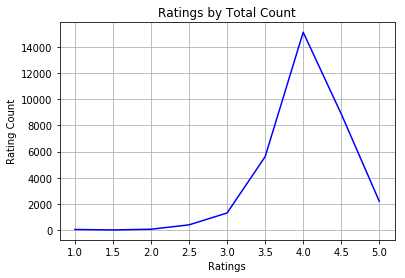

In [2]:
reviewOverall = speakeasyDF.groupby(["Rating"])
ratingCountsOverall = reviewOverall["Reviews"].count().tolist()
ratingCountsOverall.insert(1, 0)
ratings = ["1.0", "1.5", "2.0", "2.5", "3.0", "3.5", "4.0", "4.5", "5.0"]
plt.plot(ratings, ratingCountsOverall, color='blue')
plt.grid()
plt.xlabel("Ratings")
plt.ylabel("Rating Count")
plt.title("Ratings by Total Count")
plt.savefig('overallRatingCurve.png')

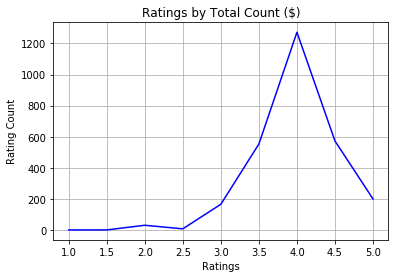

In [3]:
dfCheap = speakeasyDF.loc[speakeasyDF["Price"] == "$", :]
reviewCheap = dfCheap.groupby(["Rating"])
ratingCountsCheap = reviewCheap["Reviews"].count().tolist()
ratingCountsCheap.insert(0, 0)
ratingCountsCheap.insert(0, 0)
plt.plot(ratings, ratingCountsCheap, color='blue')
plt.grid()
plt.xlabel("Ratings")
plt.ylabel("Rating Count")
plt.title(f"Ratings by Total Count (\$)")
plt.savefig('cheapRatingCurve.png')

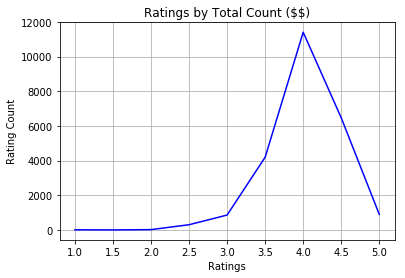

In [4]:
dfBudget = speakeasyDF.loc[speakeasyDF["Price"] == "$$", :]
reviewBudget = dfBudget.groupby(["Rating"])
ratingCountsBudget = reviewBudget["Reviews"].count().tolist()
ratingCountsBudget.insert(1, 0)
plt.plot(ratings, ratingCountsBudget, color='blue')
plt.grid()
plt.xlabel("Ratings")
plt.ylabel("Rating Count")
plt.title(f"Ratings by Total Count (\$\$)")
plt.savefig('budgetRatingCurve.png')

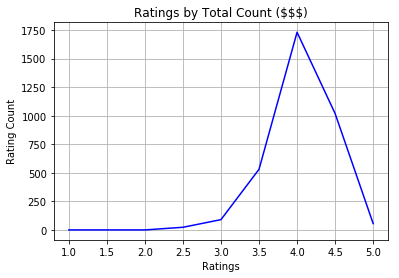

In [5]:
dfCasual = speakeasyDF.loc[speakeasyDF["Price"] == "$$$", :]
reviewCasual = dfCasual.groupby(["Rating"])
ratingCountsCasual = reviewCasual["Reviews"].count().tolist()
ratingCountsCasual.insert(0, 0)
ratingCountsCasual.insert(0, 0)
ratingCountsCasual.insert(0, 0)
plt.plot(ratings, ratingCountsCasual, color='blue')
plt.grid()
plt.xlabel("Ratings")
plt.ylabel("Rating Count")
plt.title(f"Ratings by Total Count (\$\$\$)")
plt.savefig('casualRatingCurve.png')

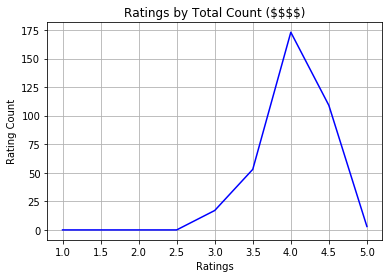

In [6]:
dfFormal = speakeasyDF.loc[speakeasyDF["Price"] == "$$$$", :]
reviewFormal = dfFormal.groupby(["Rating"])
ratingCountsFormal = reviewFormal["Reviews"].count().tolist()
ratingCountsFormal.insert(0, 0)
ratingCountsFormal.insert(0, 0)
ratingCountsFormal.insert(0, 0)
ratingCountsFormal.insert(0, 0)
plt.plot(ratings, ratingCountsFormal, color='blue')
plt.grid()
plt.xlabel("Ratings")
plt.ylabel("Rating Count")
plt.title(f"Ratings by Total Count (\$\$\$\$)")
plt.savefig('formalRatingCurve.png')

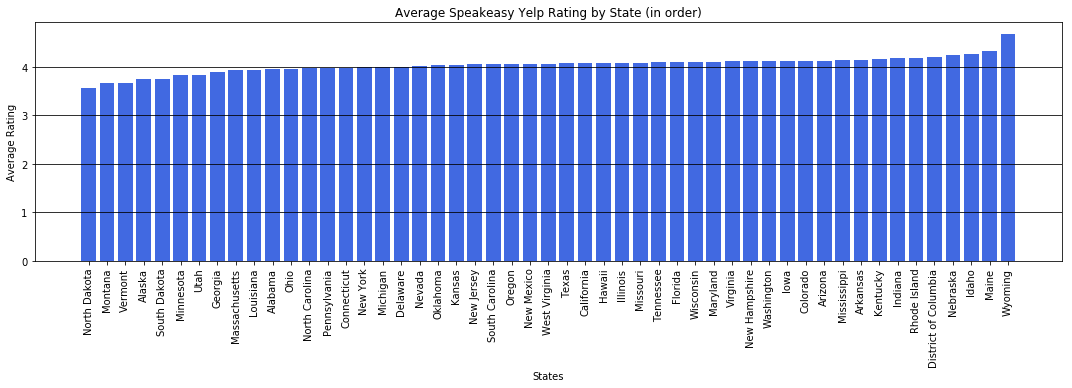

In [7]:
reviewByStateGB = speakeasyDF.groupby(["State"])
avgReviewByStateDF = reviewByStateGB.mean()
avgReviewByStateDF.reset_index(level=0, inplace=True)
sorted_avgReviewByStateDF = avgReviewByStateDF.sort_values(by="Rating", ascending=[True])
sorted_avgReviewByStateDF.reset_index(level=0, inplace=True)
del sorted_avgReviewByStateDF["index"]
sorted_avgReviewByStateDF.head()
avgRatingStates = sorted_avgReviewByStateDF["State"]
avgRating = sorted_avgReviewByStateDF["Rating"]
plt.figure(figsize=(15, 5.5))
plt.bar(avgRatingStates, avgRating, color='royalblue')
plt.xticks(rotation=90)
plt.title("Average Speakeasy Yelp Rating by State (in order)")
plt.xlabel("States")
plt.ylabel("Average Rating")
plt.grid(axis = 'y', color = 'k')
plt.tight_layout()
plt.savefig('orderedAvgRatingByState.png')

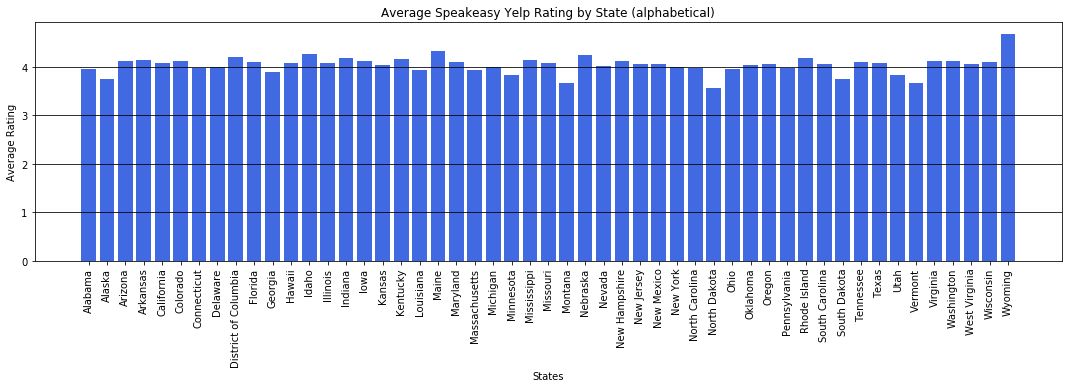

In [9]:
alphabeticalAvgRatingStates = avgReviewByStateDF["State"]
alphabeticalAvgRating = avgReviewByStateDF["Rating"]
plt.figure(figsize=(15, 5.5))
plt.bar(alphabeticalAvgRatingStates, alphabeticalAvgRating, color='royalblue')
plt.xticks(rotation=90)
plt.title("Average Speakeasy Yelp Rating by State (alphabetical)")
plt.xlabel("States")
plt.ylabel("Average Rating")
plt.grid(axis = 'y', color = 'k')
plt.tight_layout()
plt.savefig('alphabeticalAvgRatingByState.png')